Name : M. vinoothna

Sub Batch : EE3

Enrollment No : 23115077

# Handling Imbalanced Datasets Using Sampling Techniques

This notebook demonstrates how to handle imbalanced datasets using various sampling techniques on the **Pima Indians Diabetes** dataset from Kaggle. We use the following methods to balance the dataset:

- **Random Oversampling**
- **Random Undersampling**
- **Tomek Links** (as a cleaning method)
- **SMOTE** (Synthetic Minority Over-sampling Technique)
- **Class Weighting** (applied directly in the model)

A Decision Tree classifier is trained on the original imbalanced dataset and on the balanced datasets. We then evaluate the performance using Accuracy, F1 Score, and AUC.

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Sampling techniques from imbalanced-learn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

# Set random seed for reproducibility
RANDOM_STATE = 42

# Load the Pima Indians Diabetes dataset
# Ensure that the file 'diabetes.csv' is in the same directory as this notebook
url= '/content/diabetes.csv'
df = pd.read_csv(url)
print('Dataset Shape:', df.shape)
print(df.head())

# Check class distribution
print('\nOriginal class distribution:')
print(df['Outcome'].value_counts())

Dataset Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Original class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


## Preprocessing

Split the dataset into features (`X`) and target (`y`), then into training and testing sets.

In [4]:
# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

print('Train set class distribution:', dict(zip(*np.unique(y_train, return_counts=True))))
print('Test set class distribution:', dict(zip(*np.unique(y_test, return_counts=True))))

Train set class distribution: {0: 350, 1: 187}
Test set class distribution: {0: 150, 1: 81}


## Define a Function for Model Training and Evaluation

This function trains a Decision Tree classifier on the provided training data and evaluates its performance on the test data using Accuracy, F1 Score, and AUC.

In [5]:
def train_and_evaluate(X_train, y_train, X_test, y_test, class_weight=None):
    # Initialize a Decision Tree classifier (using class_weight if provided)
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight=class_weight)
    clf.fit(X_train, y_train)

    # Predict on test data
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    return acc, f1, auc

# Create a dictionary to hold performance metrics
results = {}

## Evaluate on the Original Imbalanced Dataset

In [6]:
# Train and evaluate on the original imbalanced training set
acc, f1, auc = train_and_evaluate(X_train, y_train, X_test, y_test)
results['Original'] = {'Accuracy': acc, 'F1 Score': f1, 'AUC': auc}
print('Original Dataset Performance:', results['Original'])

Original Dataset Performance: {'Accuracy': 0.7619047619047619, 'F1 Score': 0.6206896551724138, 'AUC': 0.7144444444444444}


## Apply Sampling Techniques

### 1. Random Oversampling

In [7]:
# Random Oversampling
ros = RandomOverSampler(random_state=RANDOM_STATE)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

acc, f1, auc = train_and_evaluate(X_ros, y_ros, X_test, y_test)
results['Random Oversampling'] = {'Accuracy': acc, 'F1 Score': f1, 'AUC': auc}
print('Random Oversampling Performance:', results['Random Oversampling'])

Random Oversampling Performance: {'Accuracy': 0.70995670995671, 'F1 Score': 0.5503355704697986, 'AUC': 0.6630864197530865}


### 2. Random Undersampling

In [8]:
# Random Undersampling
rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

acc, f1, auc = train_and_evaluate(X_rus, y_rus, X_test, y_test)
results['Random Undersampling'] = {'Accuracy': acc, 'F1 Score': f1, 'AUC': auc}
print('Random Undersampling Performance:', results['Random Undersampling'])

Random Undersampling Performance: {'Accuracy': 0.7272727272727273, 'F1 Score': 0.6701570680628273, 'AUC': 0.7417283950617284}


### 3. Tomek Links

Note: Tomek Links is used as a cleaning method. We remove Tomek links from the training set.

In [9]:
# Apply Tomek Links on the original training set
tl = TomekLinks(sampling_strategy='auto')
X_tl, y_tl = tl.fit_resample(X_train, y_train)

acc, f1, auc = train_and_evaluate(X_tl, y_tl, X_test, y_test)
results['Tomek Links'] = {'Accuracy': acc, 'F1 Score': f1, 'AUC': auc}
print('Tomek Links Performance:', results['Tomek Links'])

Tomek Links Performance: {'Accuracy': 0.7359307359307359, 'F1 Score': 0.6347305389221557, 'AUC': 0.7171604938271605}


### 4. SMOTE

In [10]:
# SMOTE
smote = SMOTE(random_state=RANDOM_STATE)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

acc, f1, auc = train_and_evaluate(X_smote, y_smote, X_test, y_test)
results['SMOTE'] = {'Accuracy': acc, 'F1 Score': f1, 'AUC': auc}
print('SMOTE Performance:', results['SMOTE'])

SMOTE Performance: {'Accuracy': 0.7445887445887446, 'F1 Score': 0.6289308176100629, 'AUC': 0.7153086419753086}


### 5. Class Weighting

For class weighting, we use the original imbalanced data but instruct the classifier to use balanced class weights.

In [11]:
# Class Weighting using 'balanced' option
acc, f1, auc = train_and_evaluate(X_train, y_train, X_test, y_test, class_weight='balanced')
results['Class Weighting'] = {'Accuracy': acc, 'F1 Score': f1, 'AUC': auc}
print('Class Weighting Performance:', results['Class Weighting'])

Class Weighting Performance: {'Accuracy': 0.7056277056277056, 'F1 Score': 0.5584415584415584, 'AUC': 0.6654320987654323}


## Performance Comparison

The table below summarizes the performance metrics for the original imbalanced dataset and for the datasets balanced using various techniques.

              Technique  Accuracy  F1 Score       AUC
0              Original  0.761905  0.620690  0.714444
1   Random Oversampling  0.709957  0.550336  0.663086
2  Random Undersampling  0.727273  0.670157  0.741728
3           Tomek Links  0.735931  0.634731  0.717160
4                 SMOTE  0.744589  0.628931  0.715309
5       Class Weighting  0.705628  0.558442  0.665432


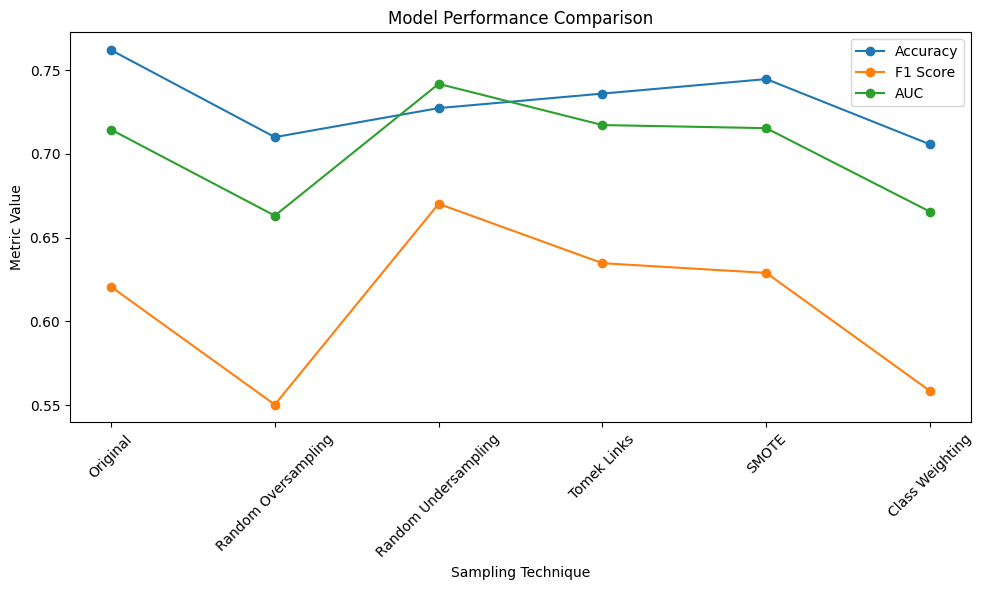

In [12]:
# Convert results to a DataFrame and display
performance_df = pd.DataFrame(results).T
performance_df.index.name = 'Technique'
performance_df = performance_df.reset_index()
print(performance_df)

# Plot the metrics for visualization
plt.figure(figsize=(10,6))
plt.plot(performance_df['Technique'], performance_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(performance_df['Technique'], performance_df['F1 Score'], marker='o', label='F1 Score')
plt.plot(performance_df['Technique'], performance_df['AUC'], marker='o', label='AUC')
plt.xticks(rotation=45)
plt.xlabel('Sampling Technique')
plt.ylabel('Metric Value')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()